## Model Selection and Final Choice

After evaluating several classification models, including:
* Logistic Regression
* Random Forest
* Multinomial Naive Bayes
* K-Nearest Neighbors

The evaluation of these above 4 models can be found in `OtherModelEvaluation.ipynb` file

The **Support Vector Machine (SVM)** achieved the highest performance on the validation set. It was the clear winner and has been selected as the best-performing model for this task.

The code cell immediately below contains the full implementation and evaluation (including Confusion Matrix and ROC Curve) for the **Support Vector Machine (LinearSVC)** model.

--------------------- Support Vector Machine (LinearSVC) ---------------------------


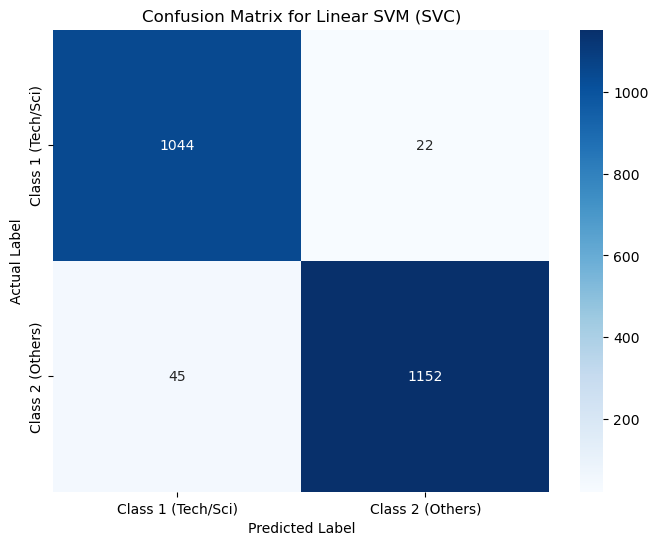

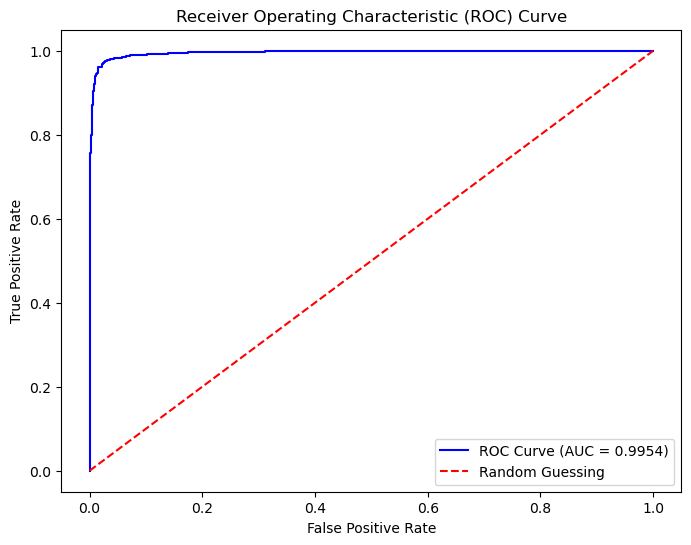


Area Under the Curve (AUC): 0.9954
Validation Accuracy: 0.9704

                    precision    recall  f1-score   support

Class 1 (Tech/Sci)       0.96      0.98      0.97      1066
  Class 2 (Others)       0.98      0.96      0.97      1197

          accuracy                           0.97      2263
         macro avg       0.97      0.97      0.97      2263
      weighted avg       0.97      0.97      0.97      2263



In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

# The `create_binary_targets` helper function processes the dataset, remapping the original 20 newsgroups into the 
# two required binary classes (Class 1 and Class 2).

def create_binary_targets(dataset):
    """
    Remaps the 20 newsgroups targets into two binary classes based on the assignment.
    
    Class 1 (Tech & Science) -> 0
    Class 2 (Others)         -> 1
    
    Args:
        dataset: The loaded scikit-learn newsgroups dataset object.
        
    Returns:
        A NumPy array of binary labels (0 or 1).
    """
    
    # Define the groupings from the assignment
    class_1_names = {
        'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware',
        'comp.sys.mac.hardware', 'comp.windows.x', 'sci.crypt', 'sci.electronics',
        'sci.med', 'sci.space'
    }

    # Get the list of 20 string names
    original_target_names = dataset.target_names
    # Get the list of 11,314 numbers (0-19)
    original_indices = dataset.target

    # Create an empty list to store our new binary (0 or 1) labels
    y_binary_list = []

    # Loop through every single index (0-19) in the original dataset
    for index in original_indices:
        # Get the actual string name for that document's index
        class_name = original_target_names[index]
        
        # Now, we compare the string name directly
        if class_name in class_1_names:
            # It's a Tech/Science class, so we append 0
            y_binary_list.append(0)
        else:
            # It's any other class, so we append 1
            y_binary_list.append(1)

    # Convert our Python list into a NumPy array
    return np.array(y_binary_list)

print("--------------------- Support Vector Machine (LinearSVC) ---------------------------")

# 1. Download the training dataset
newsgroups_train = fetch_20newsgroups(subset='train')

# 2. Create the binary labels by calling "create_binary_targets" helper function
y_binary = create_binary_targets(newsgroups_train)

# 3. Preprocess the data using TF-IDF vectorizer
# We use the original text data
X = newsgroups_train.data
vectorizer = TfidfVectorizer(stop_words='english')
X_vec = vectorizer.fit_transform(X)

# 4. Split the data into training and validation sets
# We use our new 'y_binary' as the target
X_train, X_val, y_train, y_val = train_test_split(X_vec, y_binary, test_size=0.2, random_state=72)

# 5. Train a LinearSVC classifier
clf_svm = LinearSVC(random_state=72, dual="auto") # (dual="auto" suppresses a warning)
clf_svm.fit(X_train, y_train)

# 6. Predict on the validation set
y_pred_svm = clf_svm.predict(X_val)

# 7. Generate and plot the Confusion Matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_pred_svm)

# Define the class names
class_names = ['Class 1 (Tech/Sci)', 'Class 2 (Others)']

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names)

# Add titles and labels
plt.title(f'Confusion Matrix for Linear SVM (SVC)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# 8. Generate and plot the ROC Curve

# Get the decision function scores (not probabilities)
y_pred_scores = clf_svm.decision_function(X_val)

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_val, y_pred_scores)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_val, y_pred_scores)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print(f"\nArea Under the Curve (AUC): {auc:.4f}")

# 9. Calculate accuracy and other metrics
accuracy_svm = accuracy_score(y_val, y_pred_svm)
print(f"Validation Accuracy: {accuracy_svm:.4f}\n")

# 0 = Tech & Science, 1 = Sports/Politics/Misc
print(classification_report(y_val, y_pred_svm, target_names=['Class 1 (Tech/Sci)', 'Class 2 (Others)']))

FINAL EVALUATION ON TEST DATASET

Generating final plots for test data...


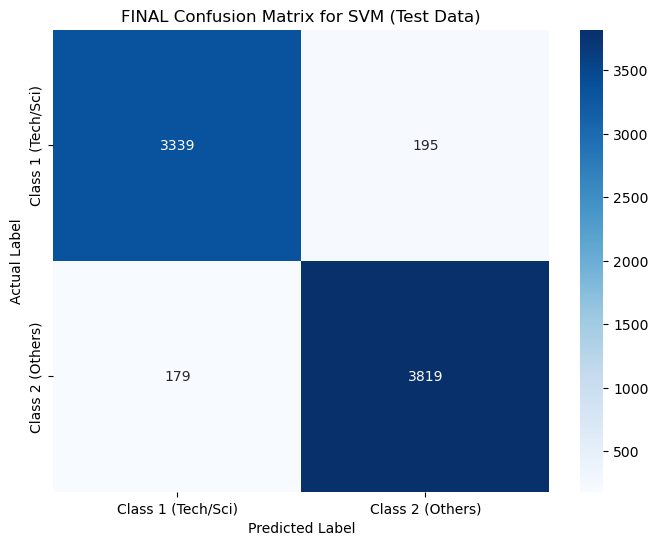

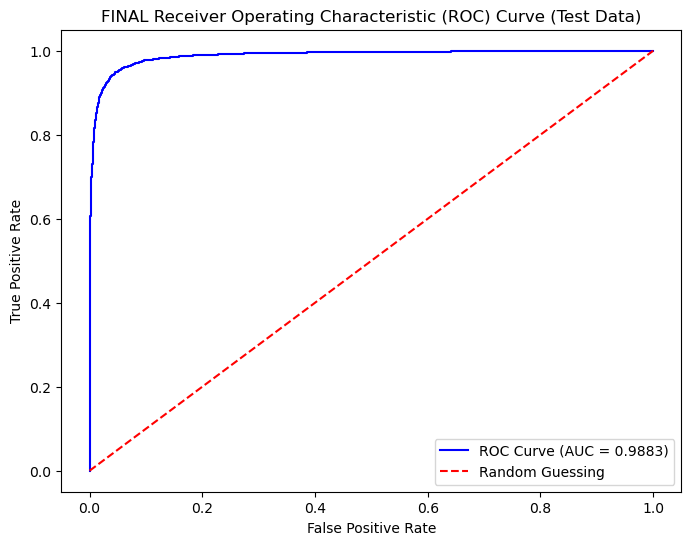


--- Final Test Results for Support Vector Machine (SVM) ---

Final Test Area Under the Curve (AUC): 0.9883
Final Test Accuracy: 0.9503

Final Classification Report:
                    precision    recall  f1-score   support

Class 1 (Tech/Sci)       0.95      0.94      0.95      3534
  Class 2 (Others)       0.95      0.96      0.95      3998

          accuracy                           0.95      7532
         macro avg       0.95      0.95      0.95      7532
      weighted avg       0.95      0.95      0.95      7532



In [2]:
# FINAL EVALUATION ON TEST DATA
print("FINAL EVALUATION ON TEST DATASET")

# The `create_binary_targets` helper function processes the dataset, remapping the original 20 newsgroups into the 
# two required binary classes (Class 1 and Class 2).

def create_binary_targets(dataset):
    """
    Remaps the 20 newsgroups targets into two binary classes based on the assignment.
    
    Class 1 (Tech & Science) -> 0
    Class 2 (Others)         -> 1
    
    Args:
        dataset: The loaded scikit-learn newsgroups dataset object.
        
    Returns:
        A NumPy array of binary labels (0 or 1).
    """
    
    # Define the groupings from the assignment
    class_1_names = {
        'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware',
        'comp.sys.mac.hardware', 'comp.windows.x', 'sci.crypt', 'sci.electronics',
        'sci.med', 'sci.space'
    }

    # Get the list of 20 string names
    original_target_names = dataset.target_names
    # Get the list of 11,314 numbers (0-19)
    original_indices = dataset.target

    # Create an empty list to store our new binary (0 or 1) labels
    y_binary_list = []

    # Loop through every single index (0-19) in the original dataset
    for index in original_indices:
        # Get the actual string name for that document's index
        class_name = original_target_names[index]
        
        # Now, we compare the string name directly
        if class_name in class_1_names:
            # It's a Tech/Science class, so we append 0
            y_binary_list.append(0)
        else:
            # It's any other class, so we append 1
            y_binary_list.append(1)

    # Convert our Python list into a NumPy array
    return np.array(y_binary_list)

# 1. Download the separate test dataset
newsgroups_test = fetch_20newsgroups(subset='test')

# 2. Create the binary labels for the test data
# We use the exact same helper function
y_test_binary = create_binary_targets(newsgroups_test)

# 3. Get the text data
X_test = newsgroups_test.data

# 4. Transform the test data using the already fitted vectorizer
X_test_vec = vectorizer.transform(X_test)

# 5. Using the best model (SVM) to make predictions on this new data
y_pred_test = clf_svm.predict(X_test_vec)

# 6. Generate and plot the FINAL Confusion Matrix
print("\nGenerating final plots for test data...")
cm_test = confusion_matrix(y_test_binary, y_pred_test)

# Define the class names
class_names = ['Class 1 (Tech/Sci)', 'Class 2 (Others)']

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names)

# Add titles and labels
plt.title(f'FINAL Confusion Matrix for SVM (Test Data)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# 7. Generate and plot the FINAL ROC Curve
# Get the decision function scores from the SVM
y_pred_scores_test = clf_svm.decision_function(X_test_vec)

# Calculate the ROC curve points
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_binary, y_pred_scores_test)

# Calculate the AUC (Area Under the Curve)
auc_test = roc_auc_score(y_test_binary, y_pred_scores_test)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='blue', label=f'ROC Curve (AUC = {auc_test:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('FINAL Receiver Operating Characteristic (ROC) Curve (Test Data)')
plt.legend()
plt.show()

# 8. Report the final performance metrics
print("\n--- Final Test Results for Support Vector Machine (SVM) ---")

print(f"\nFinal Test Area Under the Curve (AUC): {auc_test:.4f}")

accuracy_test = accuracy_score(y_test_binary, y_pred_test)
print(f"Final Test Accuracy: {accuracy_test:.4f}\n")

# Print the final report
print("Final Classification Report:")
print(classification_report(y_test_binary, y_pred_test, target_names=['Class 1 (Tech/Sci)', 'Class 2 (Others)']))